<a href="https://colab.research.google.com/github/Mateus-Brandao/Data-Science/blob/main/Case_LooqBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importando os dados 

dados = pd.read_csv('Dados case 3 LooqBox.csv')
dados = dados.set_index('Id')
dados.head(10)

,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
Id,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333.0,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7,485820,126.0,65.0
3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7,157606,138.0,62.0
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7,60545,270.0,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6,393727,325.0,40.0
6,The Great Wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6,56036,45.0,42.0
7,La La Land,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8,258682,151.0,93.0
8,Mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6,2490,NaN,71.0
9,The Lost City of Z,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7,7188,8.0,78.0


In [6]:
# verificando a quantidade de entradas em cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1000 non-null   object 
 1   Genre            1000 non-null   object 
 2   Director         1000 non-null   object 
 3   Actors           1000 non-null   object 
 4   Year             1000 non-null   int64  
 5   Runtime          1000 non-null   int64  
 6   Rating           1000 non-null   int64  
 7   Votes            1000 non-null   int64  
 8   RevenueMillions  872 non-null    float64
 9   Metascore        936 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 85.9+ KB


In [7]:
# é possível notar que as colunas RevenueMillions e MetaScore possuem dados nulos, então deve-se retira-los para não afetar a análise
dados = dados.dropna()

In [8]:
# verificando se os nulos sairam
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            838 non-null    object 
 1   Genre            838 non-null    object 
 2   Director         838 non-null    object 
 3   Actors           838 non-null    object 
 4   Year             838 non-null    int64  
 5   Runtime          838 non-null    int64  
 6   Rating           838 non-null    int64  
 7   Votes            838 non-null    int64  
 8   RevenueMillions  838 non-null    float64
 9   Metascore        838 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 72.0+ KB


In [9]:
# descrevendo os dados

dados.describe()

,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
count,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,2012.50716,114.638425,6.867542,1.932303e+05,84.550119,59.575179
std,3.17236,18.470922,0.932807,1.930990e+05,104.520418,16.952416
min,2006.00000,66.000000,2.000000,1.780000e+02,0.000000,11.000000
25%,2010.00000,101.000000,6.000000,6.127650e+04,14.000000,47.000000
50%,2013.00000,112.000000,7.000000,1.368795e+05,48.000000,60.000000
75%,2015.00000,124.000000,8.000000,2.710830e+05,117.000000,72.000000
max,2016.00000,187.000000,9.000000,1.791916e+06,937.000000,100.000000


In [10]:
# ordenando os dados e verificando o top 10 filmes baseado na Metascore

top_10_score = dados.sort_values('Metascore', ascending = False)
top_10_score.head(10)

,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
Id,,,,,,,,,,
657,Boyhood,Drama,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,8,286722,25.0,100.0
42,Moonlight,Drama,Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,8,135095,28.0,99.0
231,Pan's Labyrinth,"Drama,Fantasy,War",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8,498879,38.0,98.0
510,Gravity,"Drama,Sci-Fi,Thriller",Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,8,622089,274.0,96.0
490,Ratatouille,"Animation,Comedy,Family",Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8,504039,206.0,96.0
22,Manchester by the Sea,Drama,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,8,134213,48.0,96.0
112,12 Years a Slave,"Biography,Drama,History",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8,486338,57.0,96.0
325,The Social Network,"Biography,Drama",David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",2010,120,8,510100,97.0,95.0
407,Zero Dark Thirty,"Drama,History,Thriller",Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7,226661,96.0,95.0


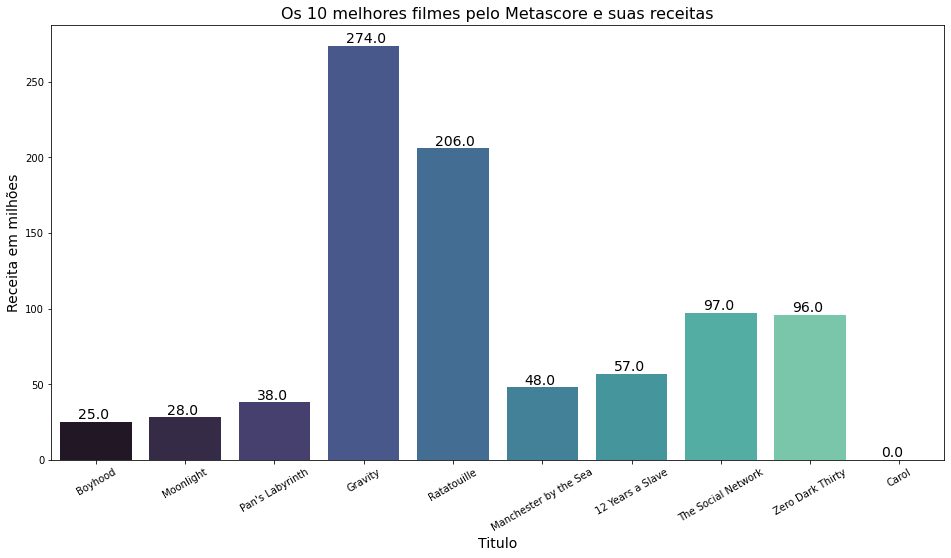

In [11]:
# verificando graficamente os 10 melhores filmes e suas receitas

# definindo o tamanho da imagem e seu título
plt.figure(figsize = (16,8))
plt.title('Os 10 melhores filmes pelo Metascore e suas receitas', fontsize = 16)

ax = sns.barplot(data = top_10_score.head(10), x = 'Title', y = 'RevenueMillions', palette= 'mako')

# mudando a rotação dos labels de x
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

# alterando o nome e o tamanho dos labels
plt.xlabel('Titulo', fontsize = 14)
plt.ylabel('Receita em milhões', fontsize = 14)

# criando variáveis para atribuir valor em cima das barras
altura = []
for i in top_10_score.head(10)['RevenueMillions']:
   altura.append(i)
posicao = []
for i in range(0,10,1): 
   posicao.append(i)
for i in range(10):
   ax.text(x=posicao[i]-0.2, y=altura[i]+2, s=str(altura[i]),   
           fontsize=14)

plt.show()

## Pode-se visualizar através do gráfico de barras a receita dos 10 melhores filmes de acordo com as notas do Metacritic. 
## É possível notar que apesar de estar em primeiro lugar nas notas, o filme Boyhood não possui a maior receita. 


Obs: de acordo com os dados o filme Carol não obteve receita.

In [12]:
# ordenando os dados e verificando os 10 filmes que mais receberam receita

top_10_receita = dados.sort_values('RevenueMillions', ascending = False)
top_10_receita.head(10)

,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
Id,,,,,,,,,,
51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8,661608,937.0,81.0
88,Avatar,"Action,Adventure,Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,8,935408,761.0,83.0
86,Jurassic World,"Action,Adventure,Sci-Fi",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7,455169,652.0,59.0
77,The Avengers,"Action,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8,1045588,623.0,69.0
55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9,1791916,533.0,82.0
13,Rogue One,"Action,Adventure,Sci-Fi",Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,8,323118,532.0,65.0
120,Finding Dory,"Animation,Adventure,Comedy",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7,157026,486.0,77.0
95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7,516895,459.0,66.0
125,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,9,1222645,448.0,78.0


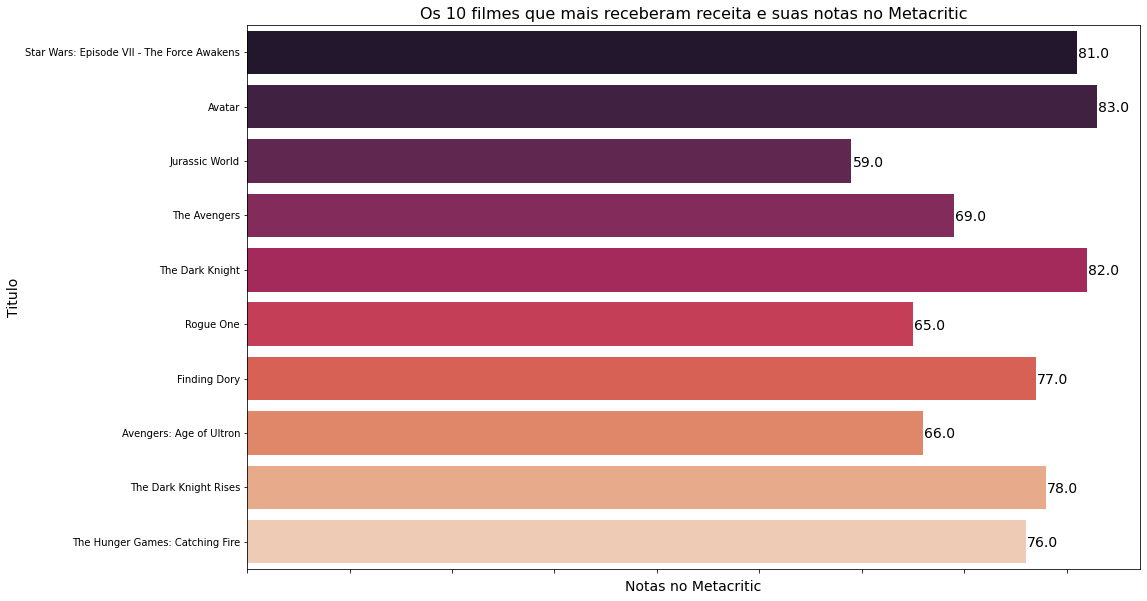

In [13]:
# verificando graficamente os 10 filmes que mais receberam receita

# definindo o tamanho da imagem e seu título
plt.figure(figsize = (16,10))
plt.title('Os 10 filmes que mais receberam receita e suas notas no Metacritic', fontsize = 16)

ax = sns.barplot(data = top_10_receita.head(10), x = 'Metascore', y = 'Title', palette= 'rocket')

# mudando a rotação dos labels de x
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

# alterando o nome e o tamanho dos labels
plt.xlabel('Notas no Metacritic', fontsize = 14)
plt.ylabel('Titulo', fontsize = 14)

# criando variáveis para atribuir valor em cima das barras
altura1 = []
for i in top_10_receita.head(10)['Metascore']:
   altura1.append(i)
posicao1 = []
for i in range(0,10,1): 
   posicao1.append(i)
for i in range(10):
   ax.text(x=altura1[i]+0.1, y=posicao1[i]+0.1, s=str(altura1[i]),   
           fontsize=14)

plt.show()

## Pode-se visualizar através do gráfico de barras as notas dos 10 filmes que mais receberam receita. 
## É possível notar que apesar de estar em primeiro lugar no ranking de receitas, o filme Star Wars não possui a maior nota. 

In [14]:
# verificando quantas vezes aparece cada nota
dados['Rating'].value_counts()

7    357
6    217
8    201
5     42
9     11
4      8
2      1
3      1
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


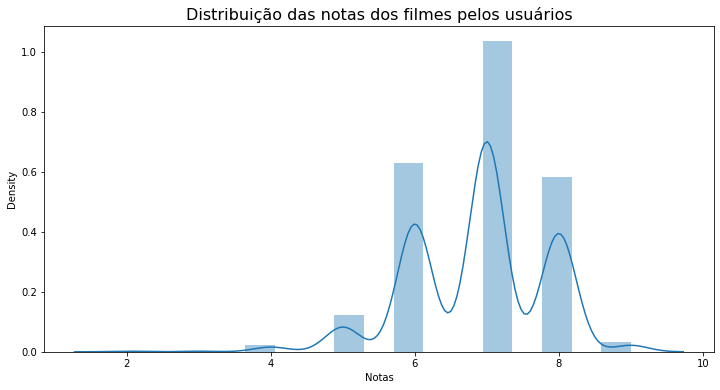

In [15]:
# verificando graficamente a distribuição das notas dos usuários

# definindo o tamanho da figura e o título
plt.figure(figsize = (12,6))
plt.title('Distribuição das notas dos filmes pelos usuários', fontsize = 16)

sns.distplot(dados.Rating)

# alterando o nome da label de x
plt.xlabel('Notas')

plt.show()

## Foi utilizado o distplot para verificar a frequência com que aparece cada nota.

In [16]:
# verificando a receita total dos filmes por ano
receita_por_ano = dados.groupby('Year').agg({'RevenueMillions':'sum'})
receita_por_ano

,RevenueMillions
Year,
2006,3574.0
2007,4095.0
2008,4680.0
2009,5209.0
2010,5989.0
2011,5344.0
2012,6826.0
2013,7397.0
2014,7945.0


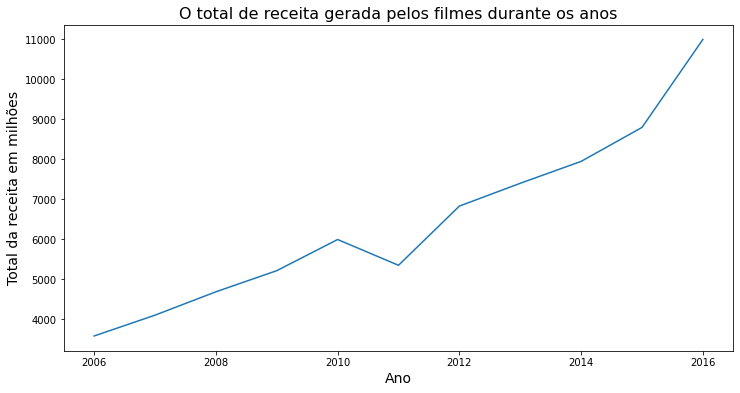

In [17]:
# definindo o tamanho da figura e o título
plt.figure(figsize = (12,6))
plt.title('O total de receita gerada pelos filmes durante os anos', fontsize = 16)

# alterando o tamanho dos labels
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Total da receita em milhões', fontsize = 14)

sns.lineplot(data = receita_por_ano, x = receita_por_ano.index, y = 'RevenueMillions', ci = None)

plt.show()

## Pode-se observar que a receita obtida pelos filmes foi maior que no ano anterior, exceto em 2011 que teve uma queda e foi menor que 2010. 

## Foi utilizado um gráfico de linha pois é um gráfico simples e de fácil observação para dados no decorrer de anos